In [1]:
import os.path
import random
import sys
import matplotlib.pyplot as plt
import seaborn as sns
from math import *

In [2]:
book_dir = '/Users/CBare/Documents/projects/data-science-from-scratch'
sys.path.extend(os.path.join(book_dir, 'chapter_{:02d}'.format(i)) for i in [3,4,5,6,7,8])

In [3]:
from stats import mean, de_mean, standard_deviation, correlation
from gradient_descent import minimize_stochastic
from vector import dot

In [4]:
def predict(x_i, beta):
    """assumes that the first element of each x_i is 1"""
    return dot(x_i, beta)

## data

The goal is to predict time spent on a site given 3 features, number of friends, work hours per day, and whether or not the person has a PhD.

$$ minutes = \alpha  + \beta_1 friends + \beta_2 work hours + \beta_3 phd + \epsilon $$

Each person is represented as a vector of 4 elements, for example:
```
[ 1, # constant term
 49, # number of friends
  4, # work hours per day
  0] # doesn't have PhD
```

In [5]:
x = [[1,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],
     [1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],
     [1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],
     [1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],
     [1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],
     [1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],
     [1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],
     [1,9,7,0],[1,9,2,0],[1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],
     [1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],
     [1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],
     [1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],
     [1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],
     [1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],
     [1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],
     [1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],
     [1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],
     [1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],
     [1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],
     [1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],
     [1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],
     [1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],
     [1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],[1,2,1,1],[1,2,9,1],
     [1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],
     [1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],
     [1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],
     [1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],
     [1,1,5,1]]

In [6]:
y = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,
     54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,
     35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,
     21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,
     40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,
     40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,
     28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,
     44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,
     25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,
     44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,
     36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,
     27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,
     26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,
     36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,
     29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,
     13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,
     31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,
     33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,
     22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [7]:
def error(x_i, y_i, beta):
    return y_i - predict(x_i, beta)

In [8]:
def squared_error(x_i, y_i, beta):
    return error(x_i, y_i, beta) ** 2

In [9]:
def squared_error_gradient(x_i, y_i, beta):
    """the gradient (with respect to beta) corresponding to the ith squared error term"""
    return [-2 * x_ij * error(x_i, y_i, beta)
            for x_ij in x_i]

In [10]:
def estimate_beta(x, y):
    beta_initial = [random.random() for x_i in x[0]]
    return minimize_stochastic(squared_error,
                               squared_error_gradient,
                               x, y,
                               beta_initial,
                               0.001)

In [11]:
random.seed(0)
beta = estimate_beta(x, y)
print(beta)

[30.619881701311712, 0.9702056472470465, -1.8671913880379478, 0.9163711597955347]


In [12]:
correlation([x_i[1] for x_i in x], [x_i[2] for x_i in x])

0.02529930456534995

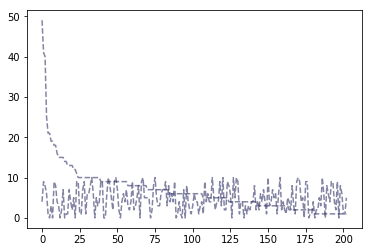

In [13]:
plt.plot([x_i[1:3] for x_i in x],
    '--',
    color='#30336699')

In [14]:
beta = estimate_beta([x_i[0:2] for x_i in x], y)
print(beta)

[23.07250671862647, 0.8902195832155126]


## Uncorrelated predictors

In [15]:
n = 100
x_friends = [int(random.lognormvariate(mu=1, sigma=1)+1) for i in range(n)]
x_friends.sort(reverse=True)
x_work_hours = [int(random.normalvariate(mu=8, sigma=2)+1) for i in range(n)]

correlation(x_friends, x_work_hours)

-0.11216408334069418

In [16]:
beta0 = 5
beta1 = 20
beta2 = 2
noise = 8
y = [beta0 + beta1 * x_i + beta2 * w_i + int(random.normalvariate(mu=0, sigma=noise))
     for x_i, w_i in zip(x_friends, x_work_hours)]

In [17]:
beta = estimate_beta([[1, x_i] for x_i in x_friends], y)
print(beta)

[24.24086114018211, 19.879459212012904]


In [18]:
beta = estimate_beta([[1, x1_i, x2_i] for x1_i, x2_i in zip(x_friends,x_work_hours)], y)
print(beta)

[-1.1490950289751125, 19.943700355848815, 2.767842331381796]


## Correlated predictors

In [19]:
n = 100
x_friends = [int(random.lognormvariate(mu=1, sigma=1)+1) for i in range(n)]
x_friends.sort(reverse=True)
x_work_hours_0 = [int(random.normalvariate(mu=8, sigma=2)+1) for i in range(n)]

c = 0.06
x_work_hours = [x_i * sin(c*pi) + w_i * cos(c*pi)
                for x_i, w_i in zip(x_friends, x_work_hours_0)]

correlation(x_friends, x_work_hours)

0.6182843481220309

In [20]:
beta0 = 5
beta1 = 20
beta2 = 2
noise = 8
y = [beta0 + beta1 * x_i + beta2 * w_i + int(random.normalvariate(mu=0, sigma=noise))
     for x_i, w_i in zip(x_friends, x_work_hours)]

In [21]:
beta = estimate_beta([[x_i] for x_i in x_friends], y)
print(beta)

[21.83016273206677]


In [22]:
beta = estimate_beta([[x1_i, x2_i] for x1_i, x2_i in zip(x_friends,x_work_hours)], y)
print(beta)

[19.99050605189383, 2.4672117470140176]


In chapter 15 on regression, Joel mentions in passing that fitting an underspecified model can lead to biased estimates of the beta coefficients. The explanation in the book was a little bit garbled - see [errata for p. 181](https://www.oreilly.com/catalog/errata.csp?isbn=0636920033400).

It's always fun to explore what can go wrong. PSU has some nice [lecture notes on Regression Methods](https://onlinecourses.science.psu.edu/stat501/node/2/). How do you know what variables belong in a regression model? Mostly, you don't. So, what happens when you get it wrong? Well, the PSU notes give 4 possibilities:

* correctly specified
* underspecified (missing important variables)
* extraneous variables (that are neither related to the response nor to any of the other predictors)
* overspecified (redundant predictor variables)

In [23]:
import numpy as np

In [24]:
n=100
a = np.random.normal(size=n)
a.sort()

In [25]:
b = a + 0.5 * np.random.normal(size=n)

In [26]:
np.corrcoef(a,b)

array([[1.        , 0.90365489],
       [0.90365489, 1.        ]])

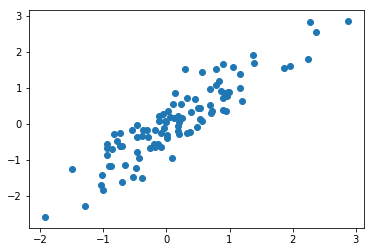

In [27]:
plt.scatter(a,b)

In [28]:
m = np.stack((np.array([1]).repeat(n),a,b),1)

In [29]:
beta = np.random.normal(size=m.shape[1])

In [30]:
beta.shape

(3,)

In [31]:
y = m @ beta + np.random.normal(size=n)

In [32]:
beta_hat = estimate_beta(m[:,0:2], y)

In [33]:
print(beta)
print(beta_hat)

[0.39990274 1.79995912 0.59866649]
[0.2739220693137689, 2.3212159904093594]


In [34]:
y_hat = m[:,0:2] @ beta_hat

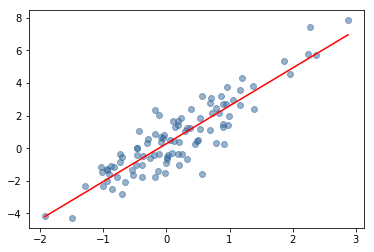

In [35]:
plt.scatter(a,y, color='#33669980')
plt.plot(a, y_hat, 'r-')

In [36]:
beta_hat = estimate_beta(m, y)
y_hat = m[:,0:2] @ beta_hat[0:2]

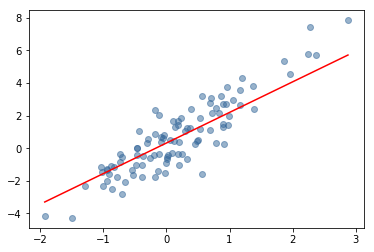

In [37]:
plt.scatter(a,y, color='#33669980')
plt.plot(a, y_hat, 'r-')

### distribution of underspecified beta

In [38]:
n=100
trials = 1000
beta_err = []
for i in range(trials):
    a = np.random.normal(size=n)
    a.sort()
    b = a + 0.5 * np.random.normal(size=n)
    m = np.stack((np.array([1]).repeat(n),a,b),1)
    beta = np.array([30, 1, -2])
    y = m @ beta + np.random.normal(size=n)
    beta_hat = estimate_beta(m[:,0:2], y)
    beta_err.append(beta_hat - beta[0:len(beta_hat)])

In [42]:
np.mean([be[1]
         for be in beta_err])

-2.001177811826612

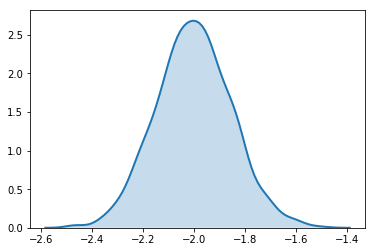

In [40]:
sns.distplot([be[1] for be in beta_err], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 2})